In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Prodigy InfoTech/Task 2/titanic.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Fill missing values in 'Age' with median age
data['Age'].fillna(data['Age'].mean(), inplace=True)
# Fill missing values in 'Embarked' with the most common port
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

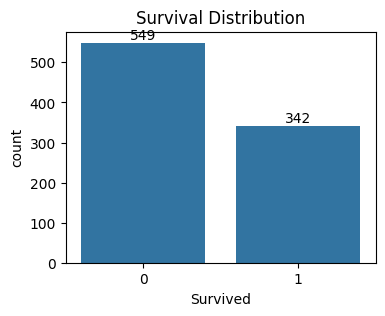

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=data['Survived'])
add_counts(ax)
plt.title('Survival Distribution')
plt.show()

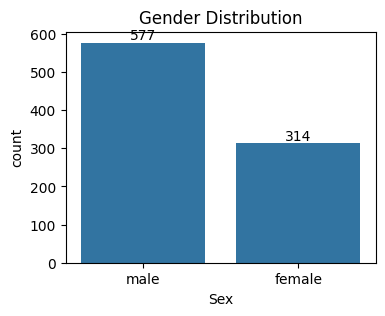

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Sex', data=data)
add_counts(ax)
plt.title('Gender Distribution')
plt.show()

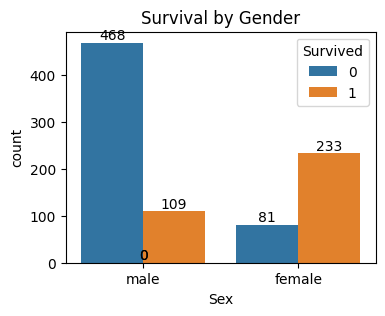

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Sex',hue='Survived',data=data)
add_counts(ax)
plt.title('Survival by Gender')
plt.show()

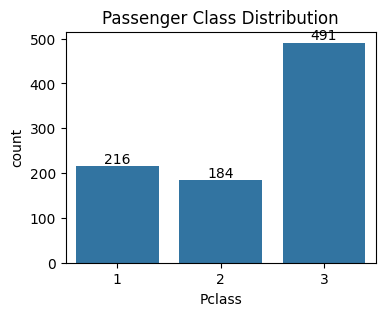

In [ ]:
# Count plot for categorical variables
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Pclass', data=data)
add_counts(ax)
plt.title('Passenger Class Distribution')
plt.show()

In [ ]:
data['Pclass']=data['Pclass'].map({1:'Upper',2:'Middle',3:'Lower'})

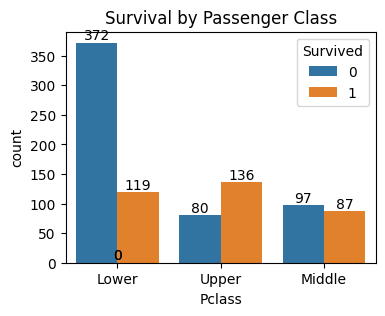

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Pclass',hue='Survived',data=data)
add_counts(ax)
plt.title('Survival by Passenger Class')
plt.show()

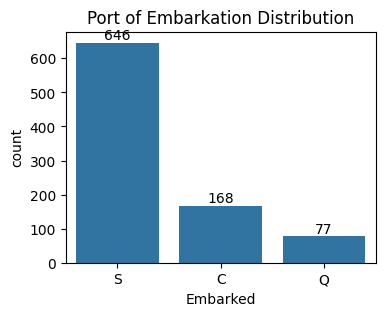

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Embarked', data=data)
add_counts(ax)
plt.title('Port of Embarkation Distribution')
plt.show()

In [ ]:
data['Embarked']=data['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})

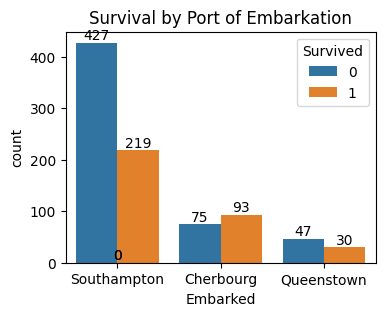

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Embarked',hue='Survived',data=data)
add_counts(ax)
plt.title('Survival by Port of Embarkation')
plt.show()

<ipython-input-24-ad6f93e525b6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, ci=None)


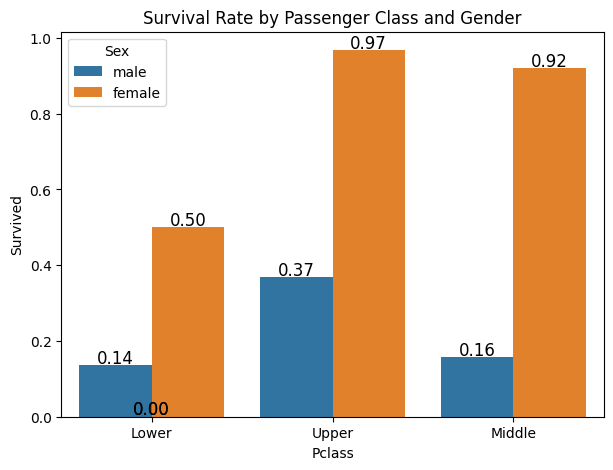

In [ ]:
# Survival rate by passenger class and gender
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, ci=None)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
data.drop(['Cabin', 'Ticket', 'Name'], axis = 1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Lower,male,22.0,1,0,7.2500,Southampton
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg
2,3,1,Lower,female,26.0,0,0,7.9250,Southampton
3,4,1,Upper,female,35.0,1,0,53.1000,Southampton
4,5,0,Lower,male,35.0,0,0,8.0500,Southampton


In [ ]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Pclass']=data['Pclass'].map({'Upper':1,'Middle':2,'Lower':3})
data['Embarked']=data['Embarked'].map({'Southampton':1,'Cherbourg':2,'Queenstown':3})

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [ ]:
correlation = data.corr()

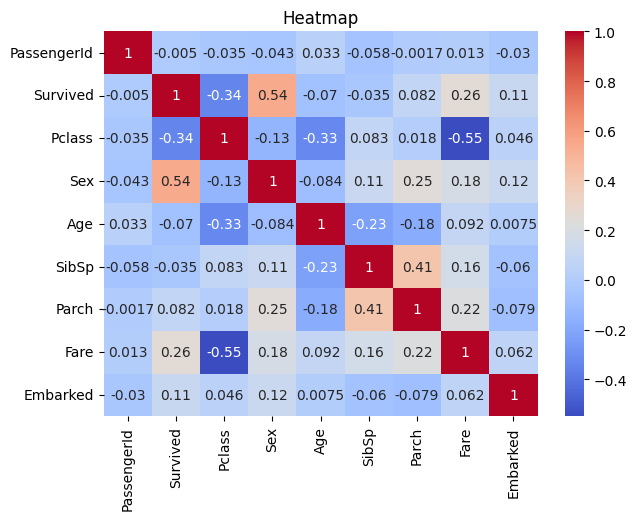

In [ ]:
#Create heatmap
plt.figure(figsize=(7,5))  # Optional: Adjust the figure size for better readability
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()